# Chapter 2 Examples and Computer Exercises

Documentation on datasets can be found at:
https://www.rdocumentation.org/packages/wooldridge/versions/1.4-2

In [58]:
library(wooldridge)
library(dplyr)
library(ggplot2)
library(broom) # augment()
library(gridExtra) # grid.arrange()
# e.g. grid.arrange(gg1,gg2,gg3,layout_matrix=rbind(c(1,1),c(2,3)))


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [283]:
simple_regression_plots <- function(x, y, d, ...) {
  model <- lm(y ~ x, data=d)
  gg1 <- ggplot(d, aes(x, y)) + 
  geom_point(...) + 
  geom_smooth(formula = "y ~ x", method="lm", se=FALSE)

  model_augment <- augment(model)
  gg2 <- ggplot(model_augment, aes(.fitted, .resid)) + 
  geom_point(...) + geom_smooth(formula = "y ~ x", method="lm", se=FALSE) + 
  theme_bw()

  return(grid.arrange(gg1,gg2))
  }


In [240]:
report_stats <- function(d = list()) {  
    len <- length(d)
    index <- 1
    string <- ""
    while (index < len) {
        string <- paste(string, d[index], ": ", d[index+1], "\n")
        index = index + 2
    }
    return(cat(string))
}

In [236]:
test <- list("a", 1, "b", 2, "c", 3)

# Examples

## Example 2.3, 2.6, 2.8, 2.11 CEO Salary and Return on Equity

In [42]:
str(ceosal1)

'data.frame':	209 obs. of  12 variables:
 $ salary  : int  1095 1001 1122 578 1368 1145 1078 1094 1237 833 ...
 $ pcsalary: int  20 32 9 -9 7 5 10 7 16 5 ...
 $ sales   : num  27595 9958 6126 16246 21783 ...
 $ roe     : num  14.1 10.9 23.5 5.9 13.8 ...
 $ pcroe   : num  106.4 -30.6 -16.3 -25.7 -3 ...
 $ ros     : int  191 13 14 -21 56 55 62 44 37 37 ...
 $ indus   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ finance : int  0 0 0 0 0 0 0 0 0 0 ...
 $ consprod: int  0 0 0 0 0 0 0 0 0 0 ...
 $ utility : int  0 0 0 0 0 0 0 0 0 0 ...
 $ lsalary : num  7 6.91 7.02 6.36 7.22 ...
 $ lsales  : num  10.23 9.21 8.72 9.7 9.99 ...
 - attr(*, "time.stamp")= chr "25 Jun 2011 23:03"


### Example 2.3

In [90]:
model <- lm(salary ~ roe, data=ceosal1)

In [91]:
summary(model)


Call:
lm(formula = salary ~ roe, data = ceosal1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1160.2  -526.0  -254.0   138.8 13499.9 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   963.19     213.24   4.517 1.05e-05 ***
roe            18.50      11.12   1.663   0.0978 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1367 on 207 degrees of freedom
Multiple R-squared:  0.01319,	Adjusted R-squared:  0.008421 
F-statistic: 2.767 on 1 and 207 DF,  p-value: 0.09777


### Example 2.6

Table 2.2 Fitted Values and Residuals for the first 15 CEOs

In [92]:
head(augment(model), 15)

salary,roe,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1095,14.1,1224.058,-129.058071,0.005414917,1369.838,2.441149e-05,-0.094697220
1001,10.9,1164.854,-163.854261,0.007401130,1369.819,5.399854e-05,-0.120349386
1122,23.5,1397.969,-275.969216,0.007427492,1369.731,1.537287e-04,-0.202699440
578,5.9,1072.348,-494.348338,0.013220986,1369.429,8.883953e-04,-0.364163283
1368,13.8,1218.508,149.492288,0.005543484,1369.828,3.354014e-05,0.109698053
1145,20.0,1333.215,-188.215063,0.005309992,1369.804,5.090298e-05,-0.138096773
1078,16.4,1266.611,-188.610785,0.004825434,1369.804,4.640737e-05,-0.138353426
1094,16.3,1264.761,-170.760660,0.004836488,1369.815,3.812703e-05,-0.125260353
1237,10.5,1157.454,79.546207,0.007744812,1369.856,1.332659e-05,0.058436045


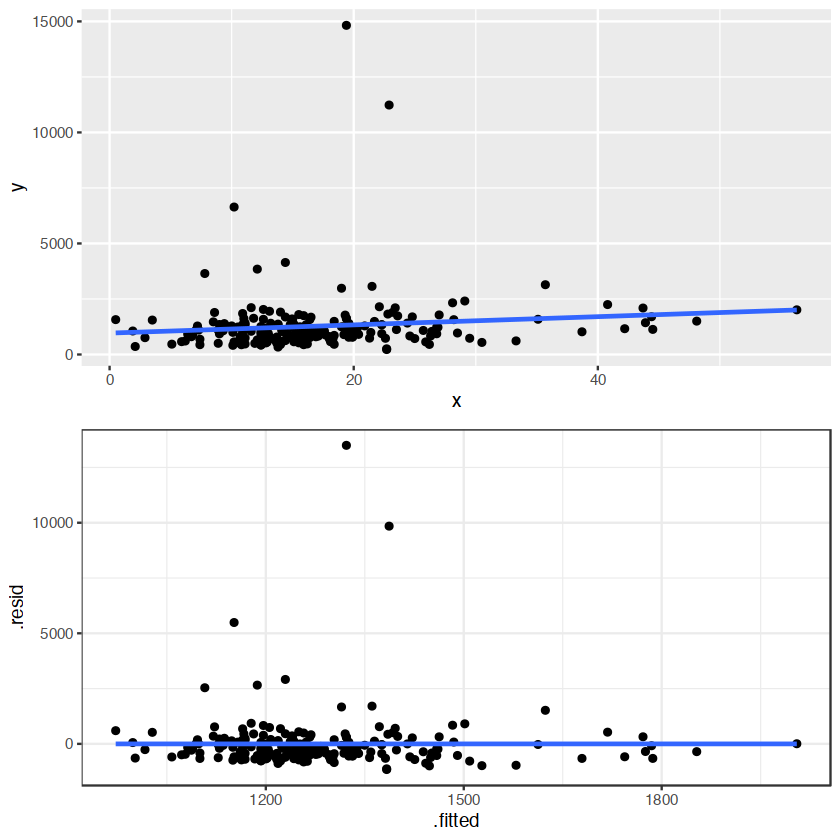

In [83]:
simple_regression_plots(ceosal1$roe, ceosal1$salary, ceosal1)

### Example 2.11

In [169]:
model <- lm(log(salary) ~ log(sales), ceosal1)

In [170]:
summary(model)


Call:
lm(formula = log(salary) ~ log(sales), data = ceosal1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.01038 -0.28140 -0.02723  0.21222  2.81128 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.82200    0.28834  16.723  < 2e-16 ***
log(sales)   0.25667    0.03452   7.436  2.7e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5044 on 207 degrees of freedom
Multiple R-squared:  0.2108,	Adjusted R-squared:  0.207 
F-statistic:  55.3 on 1 and 207 DF,  p-value: 2.703e-12


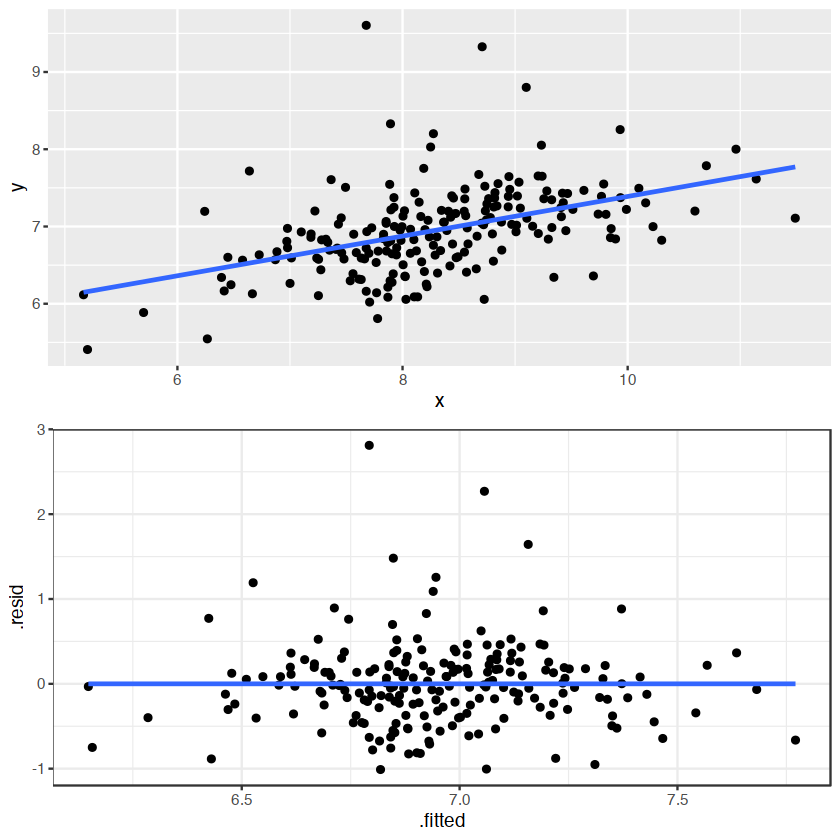

In [171]:
simple_regression_plots(ceosal1$lsales, ceosal1$lsalary, ceosal1)

## Example 2.4, 2.7, 2.10 Wage and Education

In [60]:
str(wage1)

'data.frame':	526 obs. of  24 variables:
 $ wage    : num  3.1 3.24 3 6 5.3 ...
 $ educ    : int  11 12 11 8 12 16 18 12 12 17 ...
 $ exper   : int  2 22 2 44 7 9 15 5 26 22 ...
 $ tenure  : int  0 2 0 28 2 8 7 3 4 21 ...
 $ nonwhite: int  0 0 0 0 0 0 0 0 0 0 ...
 $ female  : int  1 1 0 0 0 0 0 1 1 0 ...
 $ married : int  0 1 0 1 1 1 0 0 0 1 ...
 $ numdep  : int  2 3 2 0 1 0 0 0 2 0 ...
 $ smsa    : int  1 1 0 1 0 1 1 1 1 1 ...
 $ northcen: int  0 0 0 0 0 0 0 0 0 0 ...
 $ south   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ west    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ construc: int  0 0 0 0 0 0 0 0 0 0 ...
 $ ndurman : int  0 0 0 0 0 0 0 0 0 0 ...
 $ trcommpu: int  0 0 0 0 0 0 0 0 0 0 ...
 $ trade   : int  0 0 1 0 0 0 1 0 1 0 ...
 $ services: int  0 1 0 0 0 0 0 0 0 0 ...
 $ profserv: int  0 0 0 0 0 1 0 0 0 0 ...
 $ profocc : int  0 0 0 0 0 1 1 1 1 1 ...
 $ clerocc : int  0 0 0 1 0 0 0 0 0 0 ...
 $ servocc : int  0 1 0 0 0 0 0 0 0 0 ...
 $ lwage   : num  1.13 1.18 1.1 1.79 1.67 ...
 $ expersq : int  

In [93]:
model <- lm(wage ~ educ, data=wage1)

In [94]:
summary(model)


Call:
lm(formula = wage ~ educ, data = wage1)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3396 -2.1501 -0.9674  1.1921 16.6085 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.90485    0.68497  -1.321    0.187    
educ         0.54136    0.05325  10.167   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.378 on 524 degrees of freedom
Multiple R-squared:  0.1648,	Adjusted R-squared:  0.1632 
F-statistic: 103.4 on 1 and 524 DF,  p-value: < 2.2e-16


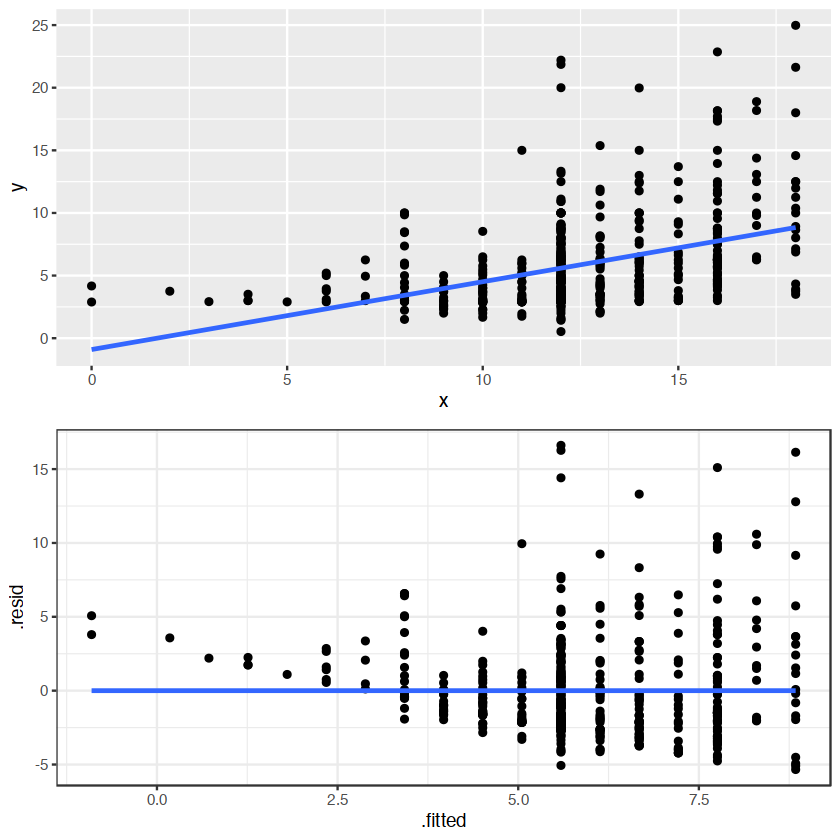

In [86]:
simple_regression_plots(wage1$educ, wage1$wage, wage1)

### Example 2.7

In [110]:
wage_hat <- coefficients(model)[1] + coefficients(model)[2]*mean(wage1$educ)
wage_bar <- mean(wage1$wage)
print(paste("wage_hat: ", as.character(wage_hat)))
print(paste("wage_bar: ", as.character(wage_bar)))

[1] "wage_hat:  5.89610267478701"
[1] "wage_bar:  5.89610267478704"


### Example 2.10

In [118]:
model <- lm(lwage ~ educ, wage1)

In [119]:
summary(model)


Call:
lm(formula = lwage ~ educ, data = wage1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.21158 -0.36393 -0.07263  0.29712  1.52339 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.583773   0.097336   5.998 3.74e-09 ***
educ        0.082744   0.007567  10.935  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4801 on 524 degrees of freedom
Multiple R-squared:  0.1858,	Adjusted R-squared:  0.1843 
F-statistic: 119.6 on 1 and 524 DF,  p-value: < 2.2e-16


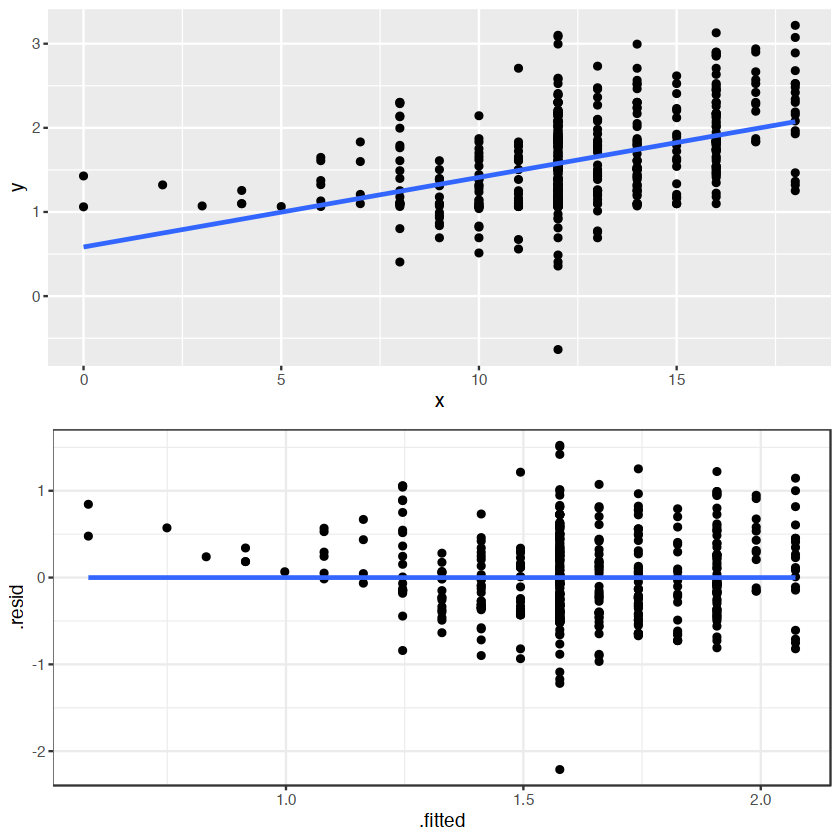

In [120]:
simple_regression_plots(wage1$educ, wage1$lwage, wage1)

#### Aside: What if we wanted to try out a constant elasticity model using education as our independent variable?

In [147]:
# This will generate an error: " NA/NaN/Inf in 'x' "
model <- lm(lwage ~ I(log(educ)), wage1)

ERROR: Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...): NA/NaN/Inf in 'x'


In [137]:
# natural log is undefined with a value of 0. So, the 2 observations with an education level of 0 either
# must be dropped or the series must be transformed. We'll try both.
count(wage1, educ)[1:4, 1:2]

,educ,n
,<int>,<int>
1,0,2
2,2,1
3,3,1
4,4,3


In [166]:
# Transform educ into educ + 1 and then run the regression:
wage1_b <- wage1 %>% mutate(educ_plus = educ + 1) 

In [167]:
model <- lm(lwage ~ I(log(educ_plus)), wage1_b)

In [168]:
summary(model)


Call:
lm(formula = lwage ~ I(log(educ_plus)), data = wage1_b)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.24894 -0.38973 -0.05641  0.31768  1.53061 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.1027     0.2062  -0.498    0.619    
I(log(educ_plus))   0.6693     0.0795   8.419 3.66e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4993 on 524 degrees of freedom
Multiple R-squared:  0.1191,	Adjusted R-squared:  0.1175 
F-statistic: 70.88 on 1 and 524 DF,  p-value: 3.656e-16


In [ ]:
# Remove observations with a value of educ=0

In [148]:
wage1_c <- subset(wage1, wage1$educ != 0)

In [149]:
model <- lm(lwage ~ I(log(educ)), wage1_c)

In [150]:
summary(model)


Call:
lm(formula = lwage ~ I(log(educ)), data = wage1_c)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.24076 -0.38426 -0.05421  0.32273  1.49421 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.44468    0.21785  -2.041   0.0417 *  
I(log(educ))  0.82521    0.08645   9.546   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4913 on 522 degrees of freedom
Multiple R-squared:  0.1486,	Adjusted R-squared:  0.147 
F-statistic: 91.12 on 1 and 522 DF,  p-value: < 2.2e-16


## Example 2.5, 2.9: Voting Outcomes and Campaign Expenditures

In [111]:
str(vote1)

'data.frame':	173 obs. of  10 variables:
 $ state   : chr  "AL" "AK" "AZ" "AZ" ...
 $ district: int  7 1 2 3 3 4 2 3 5 6 ...
 $ democA  : int  1 0 1 0 0 1 0 1 1 1 ...
 $ voteA   : int  68 62 73 69 75 69 59 71 76 73 ...
 $ expendA : num  328.3 626.4 99.6 319.7 159.2 ...
 $ expendB : num  8.74 402.48 3.07 26.28 60.05 ...
 $ prtystrA: int  41 60 55 64 66 46 58 49 71 64 ...
 $ lexpendA: num  5.79 6.44 4.6 5.77 5.07 ...
 $ lexpendB: num  2.17 6 1.12 3.27 4.1 ...
 $ shareA  : num  97.4 60.9 97 92.4 72.6 ...
 - attr(*, "time.stamp")= chr "25 Jun 2011 23:03"


In [113]:
model <- lm(voteA ~ shareA, vote1)

In [114]:
summary(model)


Call:
lm(formula = voteA ~ shareA, data = vote1)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.8919  -4.0660  -0.1682   3.4965  29.9772 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 26.81221    0.88721   30.22   <2e-16 ***
shareA       0.46383    0.01454   31.90   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.385 on 171 degrees of freedom
Multiple R-squared:  0.8561,	Adjusted R-squared:  0.8553 
F-statistic:  1018 on 1 and 171 DF,  p-value: < 2.2e-16


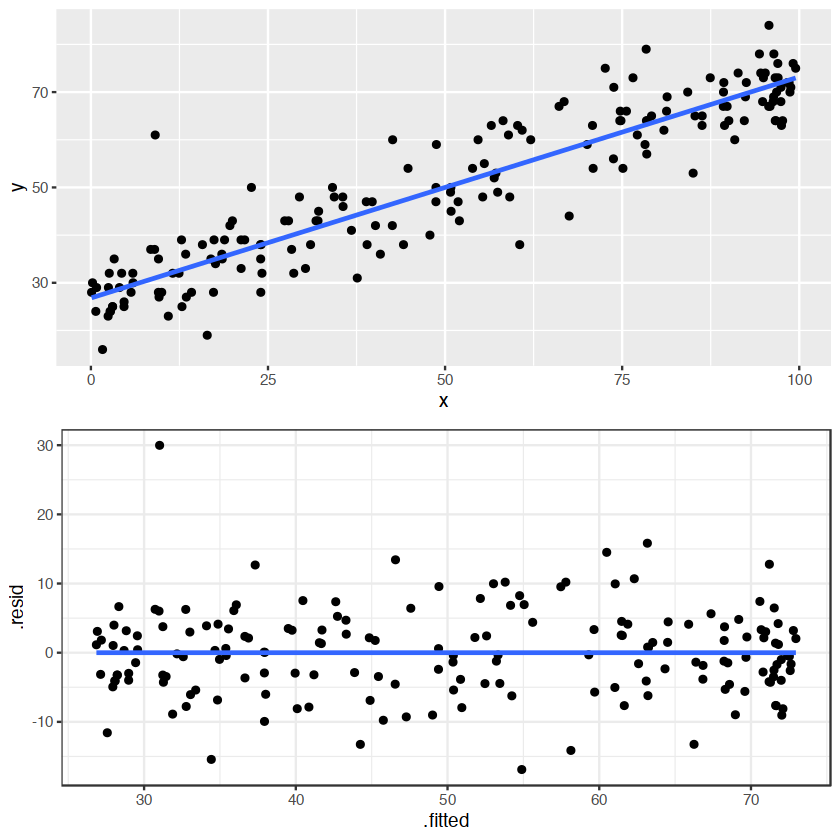

In [115]:
simple_regression_plots(vote1$shareA, vote1$voteA, vote1)

## Example 2.12 Student Math Performance and the School Lunch Program

In [174]:
str(meap93)

'data.frame':	408 obs. of  17 variables:
 $ lnchprg : num  1.4 2.3 2.7 3.4 3.4 ...
 $ enroll  : int  1862 11355 7685 1148 1572 2496 3358 11983 3499 5095 ...
 $ staff   : num  112.6 101.2 114 85.4 96.1 ...
 $ expend  : int  5765 6601 6834 3586 3847 5070 4474 5159 5012 6501 ...
 $ salary  : num  37498 48722 44541 31566 29781 ...
 $ benefits: int  7420 10370 7313 5989 5545 5895 6934 8085 7253 7386 ...
 $ droprate: num  2.9 1.3 3.5 3.6 0 ...
 $ gradrate: num  89.2 91.4 91.4 86.6 100 ...
 $ math10  : num  56.4 42.7 43.8 25.3 15.3 ...
 $ sci11   : num  67.9 65.3 54.3 60 65.8 ...
 $ totcomp : num  44918 59092 51854 37555 35326 ...
 $ ltotcomp: num  10.7 11 10.9 10.5 10.5 ...
 $ lexpend : num  8.66 8.79 8.83 8.18 8.26 ...
 $ lenroll : num  7.53 9.34 8.95 7.05 7.36 ...
 $ lstaff  : num  4.72 4.62 4.74 4.45 4.57 ...
 $ bensal  : num  0.198 0.213 0.164 0.19 0.186 ...
 $ lsalary : num  10.5 10.8 10.7 10.4 10.3 ...
 - attr(*, "time.stamp")= chr "25 Jun 2011 23:03"


In [175]:
model <- lm(math10 ~ lnchprg, meap93)

In [176]:
summary(model)


Call:
lm(formula = math10 ~ lnchprg, data = meap93)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.386  -5.979  -1.207   4.865  45.845 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 32.14271    0.99758  32.221   <2e-16 ***
lnchprg     -0.31886    0.03484  -9.152   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.566 on 406 degrees of freedom
Multiple R-squared:  0.171,	Adjusted R-squared:  0.169 
F-statistic: 83.77 on 1 and 406 DF,  p-value: < 2.2e-16


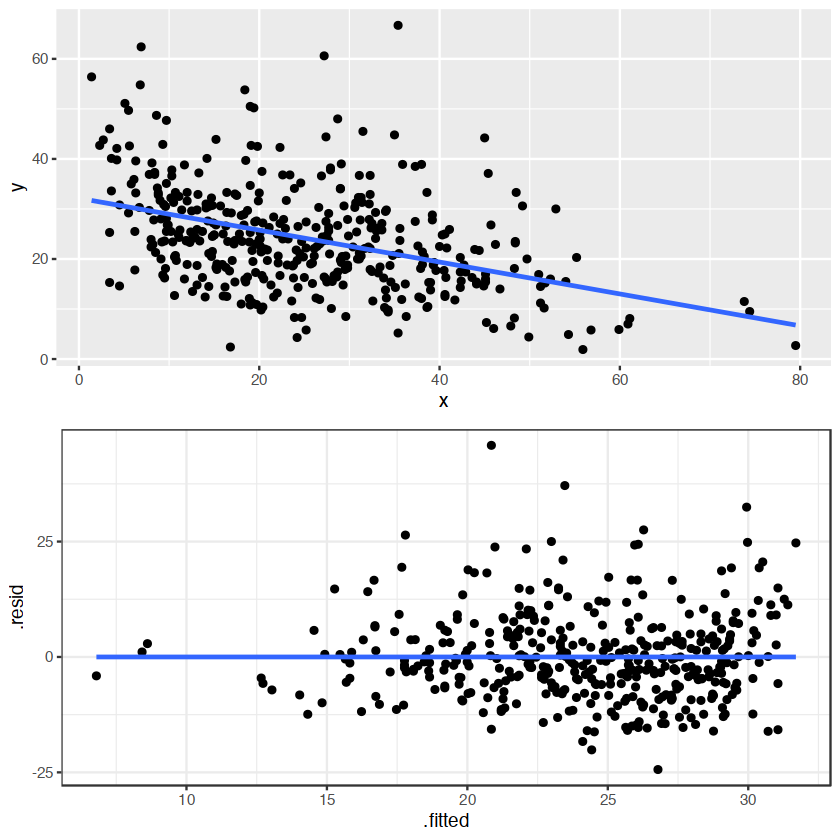

In [177]:
simple_regression_plots(meap93$lnchprg, meap93$math10, meap93)

# Computer Exercises

## C1

In [180]:
str(k401k)

'data.frame':	1534 obs. of  8 variables:
 $ prate  : num  26.1 100 97.6 100 82.5 ...
 $ mrate  : num  0.21 1.42 0.91 0.42 0.53 ...
 $ totpart: num  1653 262 166 257 591 ...
 $ totelg : num  6322 262 170 257 716 ...
 $ age    : int  8 6 10 7 28 7 31 13 21 10 ...
 $ totemp : num  8709 315 275 500 933 ...
 $ sole   : int  0 1 1 0 1 1 1 0 1 1 ...
 $ ltotemp: num  9.07 5.75 5.62 6.21 6.84 ...
 - attr(*, "time.stamp")= chr "25 Jun 2011 23:03"


In [183]:
# (i)
print(mean(k401k$prate))

[1] 87.36291


In [193]:
# (ii)
model <- lm(prate ~ mrate, k401k)
summary(model)


Call:
lm(formula = prate ~ mrate, data = k401k)

Residuals:
    Min      1Q  Median      3Q     Max 
-82.303  -8.184   5.178  12.712  16.807 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  83.0755     0.5633  147.48   <2e-16 ***
mrate         5.8611     0.5270   11.12   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.09 on 1532 degrees of freedom
Multiple R-squared:  0.0747,	Adjusted R-squared:  0.0741 
F-statistic: 123.7 on 1 and 1532 DF,  p-value: < 2.2e-16


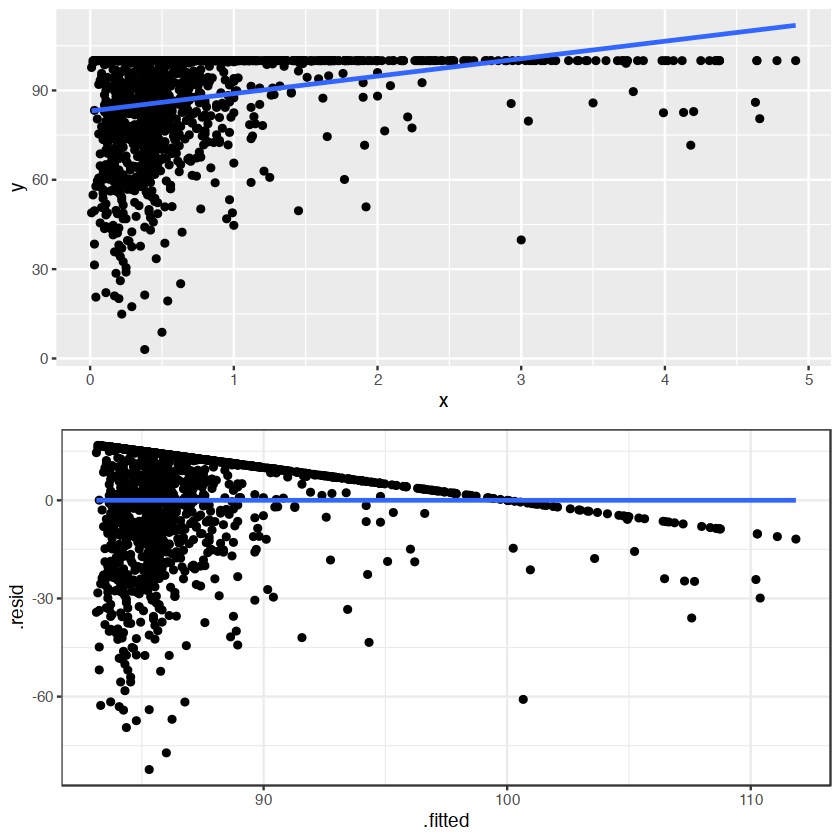

In [194]:
# Note that the residuals violate E(u|x) = 0
simple_regression_plots(k401k$mrate, k401k$prate, k401k)

(iii) The intercept of 83.08 is the predicted percentage of annual workers with a 401k given that there is no plan matching. A 100% match rate would result in an additional 5.86% of employees participating in the program.

(iv)-(v) prate(mrate=3.5) = 83.0755 + 5.8611*(3.5) = 103.59. Only about 7.5% of the variation in prate is explained by the regression. Additionally, the specification of the linear relationship between prate and mrate could be improved to include the information that the upper-bound of 100 percent for prate.

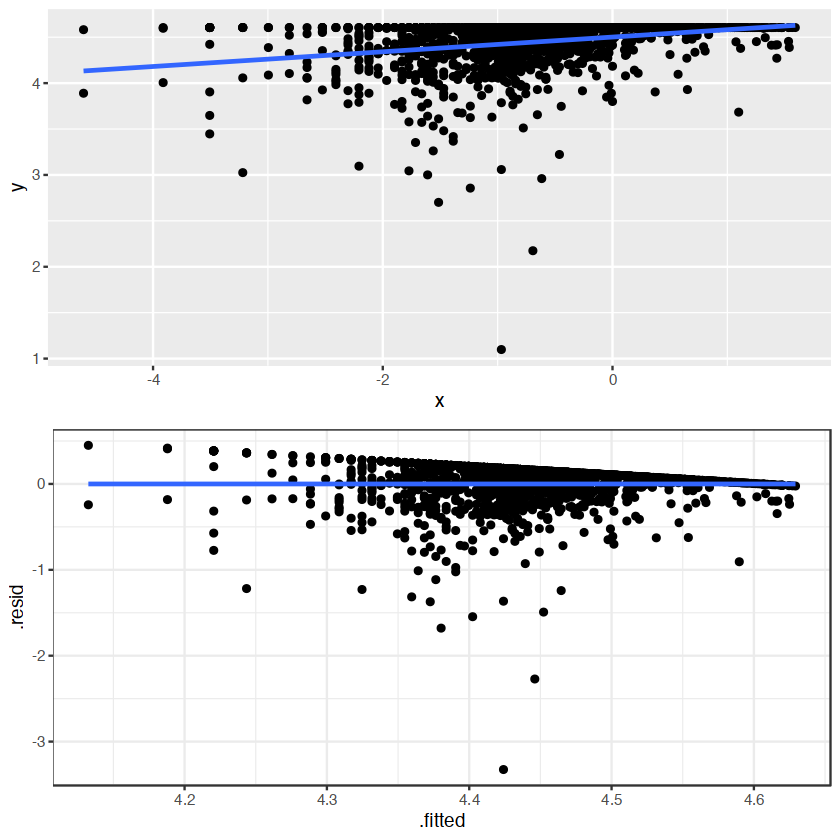

In [196]:
# respecification using a log-linear form. Gives a comparison of percentage changes.
simple_regression_plots(log(k401k$mrate), log(k401k$prate), k401k)

## C2

In [198]:
str(ceosal2)

'data.frame':	177 obs. of  15 variables:
 $ salary  : int  1161 600 379 651 497 1067 945 1261 503 1094 ...
 $ age     : int  49 43 51 55 44 64 59 63 47 64 ...
 $ college : int  1 1 1 1 1 1 1 1 1 1 ...
 $ grad    : int  1 1 1 0 1 1 0 1 1 1 ...
 $ comten  : int  9 10 9 22 8 7 35 32 4 39 ...
 $ ceoten  : int  2 10 3 22 6 7 10 8 4 5 ...
 $ sales   : num  6200 283 169 1100 351 19000 536 4800 610 2900 ...
 $ profits : int  966 48 40 -54 28 614 24 191 7 230 ...
 $ mktval  : num  23200 1100 1100 1000 387 3900 623 2100 454 3900 ...
 $ lsalary : num  7.06 6.4 5.94 6.48 6.21 ...
 $ lsales  : num  8.73 5.65 5.13 7 5.86 ...
 $ lmktval : num  10.05 7 7 6.91 5.96 ...
 $ comtensq: int  81 100 81 484 64 49 1225 1024 16 1521 ...
 $ ceotensq: int  4 100 9 484 36 49 100 64 16 25 ...
 $ profmarg: num  15.58 16.96 23.67 -4.91 7.98 ...
 - attr(*, "time.stamp")= chr "25 Jun 2011 23:03"


In [207]:
# (i)
mean_salary <- mean(ceosal2$salary)
mean_ceoten <- mean(ceosal2$ceoten)
cat(" Mean CEO Salary: ", round(mean_salary, 2), " thousand dollars", "\n", "Mean CEO Tenure:   ", round(mean_ceoten, 2), " years")
    
    



 Mean CEO Salary:  865.86  thousand dollars 
 Mean CEO Tenure:    7.95  years

In [214]:
# (ii)
head(count(ceosal2, ceoten), 3)

,ceoten,n
,<int>,<int>
1,0,5
2,1,19
3,2,10


In [213]:
tail(count(ceosal2, ceoten), 3)

,ceoten,n
,<int>,<int>
26,28,1
27,34,1
28,37,2


In [217]:
# (iii)
model <- lm(log(salary) ~ ceoten, ceosal2)
summary(model)


Call:
lm(formula = log(salary) ~ ceoten, data = ceosal2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.15314 -0.38319 -0.02251  0.44439  1.94337 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.505498   0.067991  95.682   <2e-16 ***
ceoten      0.009724   0.006364   1.528    0.128    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6038 on 175 degrees of freedom
Multiple R-squared:  0.01316,	Adjusted R-squared:  0.007523 
F-statistic: 2.334 on 1 and 175 DF,  p-value: 0.1284


The model predicts that a 1% increase in salary will result from 1 extra year of tenure.

## C3

In [218]:
str(sleep75)

'data.frame':	706 obs. of  34 variables:
 $ age     : int  32 31 44 30 64 41 35 47 32 30 ...
 $ black   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ case    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ clerical: num  0 0 0 0 0 0 0 0 0 0 ...
 $ construc: num  0 0 0 0 0 0 0 0 0 0 ...
 $ educ    : int  12 14 17 12 14 12 12 13 17 15 ...
 $ earns74 : num  0 9500 42500 42500 2500 ...
 $ gdhlth  : int  0 1 1 1 1 1 1 1 1 1 ...
 $ inlf    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ leis1   : int  3529 2140 4595 3211 4052 4812 4787 3544 4359 4211 ...
 $ leis2   : int  3479 2140 4505 3211 4007 4797 4157 3469 4359 4061 ...
 $ leis3   : int  3479 2140 4227 3211 4007 4797 4157 3439 4121 4061 ...
 $ smsa    : int  0 0 1 0 0 0 0 1 0 1 ...
 $ lhrwage : num  1.956 0.358 3.022 2.264 1.012 ...
 $ lothinc : num  10.08 0 0 0 9.33 ...
 $ male    : int  1 1 1 0 1 1 1 1 1 1 ...
 $ marr    : int  1 0 1 1 1 1 1 1 1 1 ...
 $ prot    : int  1 1 0 1 1 1 1 1 0 0 ...
 $ rlxall  : int  3163 2920 3038 3083 3493 4078 3810 3033 3606 3168 ...
 $ selfe 

In [219]:
model <- lm(sleep ~ totwrk, sleep75)

In [220]:
summary(model)


Call:
lm(formula = sleep ~ totwrk, data = sleep75)

Residuals:
     Min       1Q   Median       3Q      Max 
-2429.94  -240.25     4.91   250.53  1339.72 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3586.37695   38.91243  92.165   <2e-16 ***
totwrk        -0.15075    0.01674  -9.005   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 421.1 on 704 degrees of freedom
Multiple R-squared:  0.1033,	Adjusted R-squared:  0.102 
F-statistic: 81.09 on 1 and 704 DF,  p-value: < 2.2e-16


(i) sleep = 3586 - 0.15075 * totwrk

    706 observations
    
    R-squared is 0.1033
    
    It can be inferred that with no work the mean sleep per day would be 8.5 hours.
    
(ii) Increasing the total work by 2 hours (120 mins) would decrease daily sleep by 2.5 minutes.

## C4

In [221]:
str(wage2)

'data.frame':	935 obs. of  17 variables:
 $ wage   : int  769 808 825 650 562 1400 600 1081 1154 1000 ...
 $ hours  : int  40 50 40 40 40 40 40 40 45 40 ...
 $ IQ     : int  93 119 108 96 74 116 91 114 111 95 ...
 $ KWW    : int  35 41 46 32 27 43 24 50 37 44 ...
 $ educ   : int  12 18 14 12 11 16 10 18 15 12 ...
 $ exper  : int  11 11 11 13 14 14 13 8 13 16 ...
 $ tenure : int  2 16 9 7 5 2 0 14 1 16 ...
 $ age    : int  31 37 33 32 34 35 30 38 36 36 ...
 $ married: int  1 1 1 1 1 1 0 1 1 1 ...
 $ black  : int  0 0 0 0 0 1 0 0 0 0 ...
 $ south  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ urban  : int  1 1 1 1 1 1 1 1 0 1 ...
 $ sibs   : int  1 1 1 4 10 1 1 2 2 1 ...
 $ brthord: int  2 NA 2 3 6 2 2 3 3 1 ...
 $ meduc  : int  8 14 14 12 6 8 8 8 14 12 ...
 $ feduc  : int  8 14 14 12 11 NA 8 NA 5 11 ...
 $ lwage  : num  6.65 6.69 6.72 6.48 6.33 ...
 - attr(*, "time.stamp")= chr "25 Jun 2011 23:03"


In [278]:
# (i)
print(mean(wage2$wage))
print(mean(wage2$IQ))
print(var(wage2$IQ)^0.5)

[1] 957.9455
[1] 101.2824
[1] 15.05264


In [279]:
# (ii)
model <- lm(wage ~ IQ, wage2)
summary(model)


Call:
lm(formula = wage ~ IQ, data = wage2)

Residuals:
   Min     1Q Median     3Q    Max 
-898.7 -256.5  -47.3  201.1 2072.6 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 116.9916    85.6415   1.366    0.172    
IQ            8.3031     0.8364   9.927   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 384.8 on 933 degrees of freedom
Multiple R-squared:  0.09554,	Adjusted R-squared:  0.09457 
F-statistic: 98.55 on 1 and 933 DF,  p-value: < 2.2e-16


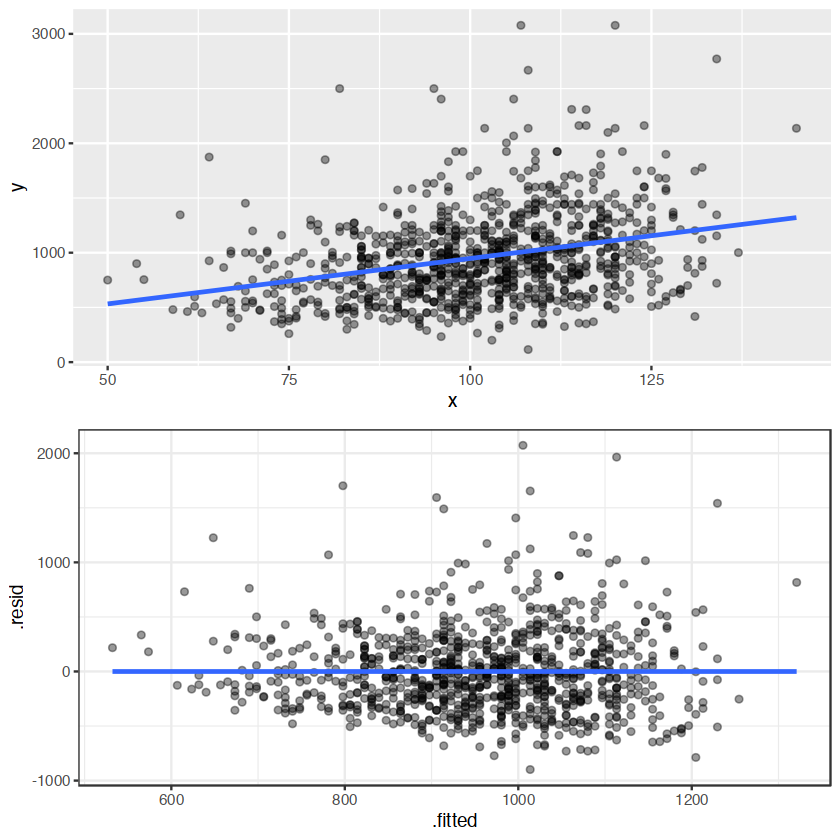

In [286]:
simple_regression_plots(wage2$IQ, wage2$wage, wage2, alpha=0.4)

(ii) dwage = 8.3 * 15  = \\$124.50 additional monthly pay predicted

In [287]:
model <- lm(log(wage) ~ IQ, wage2)
summary(model)


Call:
lm(formula = log(wage) ~ IQ, data = wage2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.09324 -0.25547  0.02261  0.27544  1.21486 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.8869943  0.0890206   66.13   <2e-16 ***
IQ          0.0088072  0.0008694   10.13   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3999 on 933 degrees of freedom
Multiple R-squared:  0.09909,	Adjusted R-squared:  0.09813 
F-statistic: 102.6 on 1 and 933 DF,  p-value: < 2.2e-16


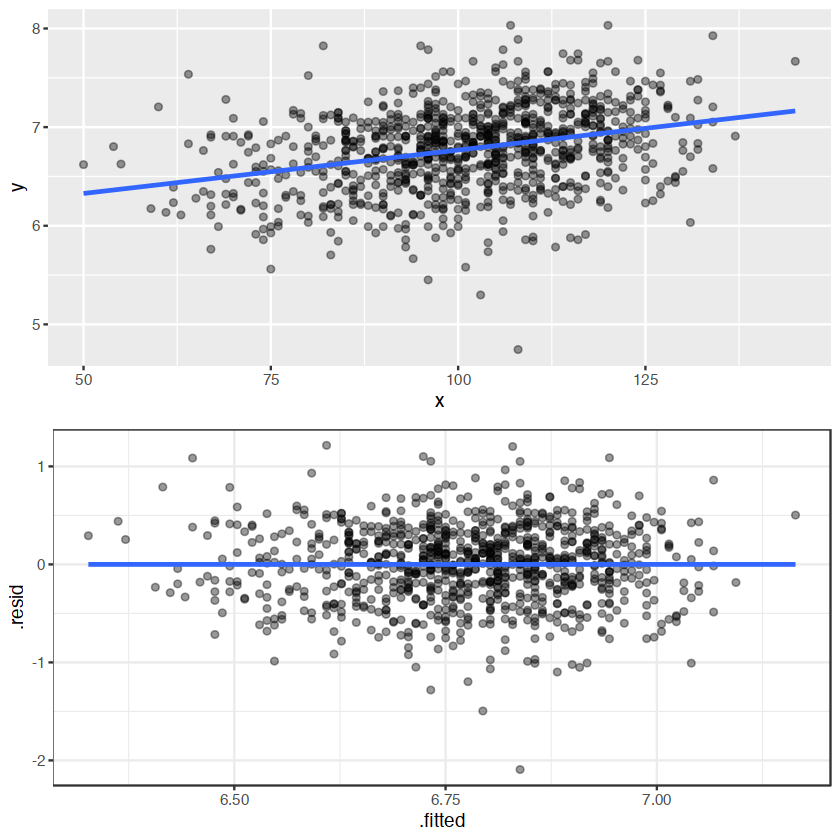

In [289]:
simple_regression_plots(wage2$IQ, wage2$lwage, wage2, alpha=0.4)

(iii) 0.008 * 15 = 0.12, 12% predicted increase in wage.

## C5

(i) log(sales) = a + b * log(rd), be represents the elasticity

In [290]:
str(rdchem)

'data.frame':	32 obs. of  8 variables:
 $ rd      : num  430.6 59 23.5 3.5 1.7 ...
 $ sales   : num  4570 2830 597 134 42 ...
 $ profits : num  186.9 467 107.4 -4.3 8 ...
 $ rdintens: num  9.42 2.08 3.94 2.62 4.05 ...
 $ profmarg: num  4.09 16.5 18 -3.22 19.05 ...
 $ salessq : num  20886730 8008900 356170 17849 1764 ...
 $ lsales  : num  8.43 7.95 6.39 4.89 3.74 ...
 $ lrd     : num  6.065 4.078 3.157 1.253 0.531 ...
 - attr(*, "time.stamp")= chr "25 Jun 2011 23:03"


In [293]:
(ii)
model <- lm(lrd ~ lsales, rdchem)
summary(model)


Call:
lm(formula = lrd ~ lsales, data = rdchem)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.90406 -0.40086 -0.02178  0.40562  1.10439 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.10472    0.45277  -9.066 4.27e-10 ***
lsales       1.07573    0.06183  17.399  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5294 on 30 degrees of freedom
Multiple R-squared:  0.9098,	Adjusted R-squared:  0.9068 
F-statistic: 302.7 on 1 and 30 DF,  p-value: < 2.2e-16


A 1% increase/decrease in sales will result in a 1.07% increases/decrease in R&D.

## C6

In [294]:
str(meap93)

'data.frame':	408 obs. of  17 variables:
 $ lnchprg : num  1.4 2.3 2.7 3.4 3.4 ...
 $ enroll  : int  1862 11355 7685 1148 1572 2496 3358 11983 3499 5095 ...
 $ staff   : num  112.6 101.2 114 85.4 96.1 ...
 $ expend  : int  5765 6601 6834 3586 3847 5070 4474 5159 5012 6501 ...
 $ salary  : num  37498 48722 44541 31566 29781 ...
 $ benefits: int  7420 10370 7313 5989 5545 5895 6934 8085 7253 7386 ...
 $ droprate: num  2.9 1.3 3.5 3.6 0 ...
 $ gradrate: num  89.2 91.4 91.4 86.6 100 ...
 $ math10  : num  56.4 42.7 43.8 25.3 15.3 ...
 $ sci11   : num  67.9 65.3 54.3 60 65.8 ...
 $ totcomp : num  44918 59092 51854 37555 35326 ...
 $ ltotcomp: num  10.7 11 10.9 10.5 10.5 ...
 $ lexpend : num  8.66 8.79 8.83 8.18 8.26 ...
 $ lenroll : num  7.53 9.34 8.95 7.05 7.36 ...
 $ lstaff  : num  4.72 4.62 4.74 4.45 4.57 ...
 $ bensal  : num  0.198 0.213 0.164 0.19 0.186 ...
 $ lsalary : num  10.5 10.8 10.7 10.4 10.3 ...
 - attr(*, "time.stamp")= chr "25 Jun 2011 23:03"


In [296]:
model <- lm(math10 ~ expend, meap93)
summary(model)


Call:
lm(formula = math10 ~ expend, data = meap93)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.579  -7.175  -0.874   6.299  39.174 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.336e+01  2.934e+00   4.553    7e-06 ***
expend      2.456e-03  6.601e-04   3.720 0.000227 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.33 on 406 degrees of freedom
Multiple R-squared:  0.03296,	Adjusted R-squared:  0.03058 
F-statistic: 13.84 on 1 and 406 DF,  p-value: 0.0002273


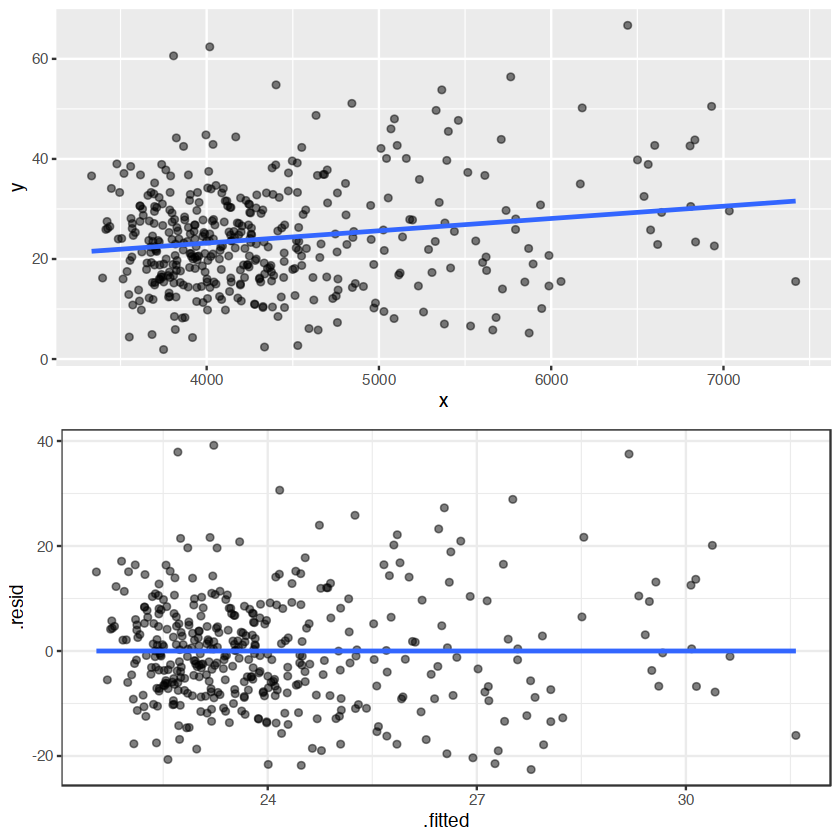

In [298]:
simple_regression_plots(meap93$expend, meap93$math10, meap93, alpha=0.5)

(i) Spending per student is correlated with many other factors such as the educational attainment/income of parents. The regression only explains about 3% of the variance in math test pass rates; I would infer nothing from the results, much less the marginal rate of return from expenditures.

In [299]:
# (ii) & (iii)
model <- lm(math10 ~ lexpend, meap93)
summary(model)


Call:
lm(formula = math10 ~ lexpend, data = meap93)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.343  -7.100  -0.914   6.148  39.093 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -69.341     26.530  -2.614 0.009290 ** 
lexpend       11.164      3.169   3.523 0.000475 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.35 on 406 degrees of freedom
Multiple R-squared:  0.02966,	Adjusted R-squared:  0.02727 
F-statistic: 12.41 on 1 and 406 DF,  p-value: 0.0004752


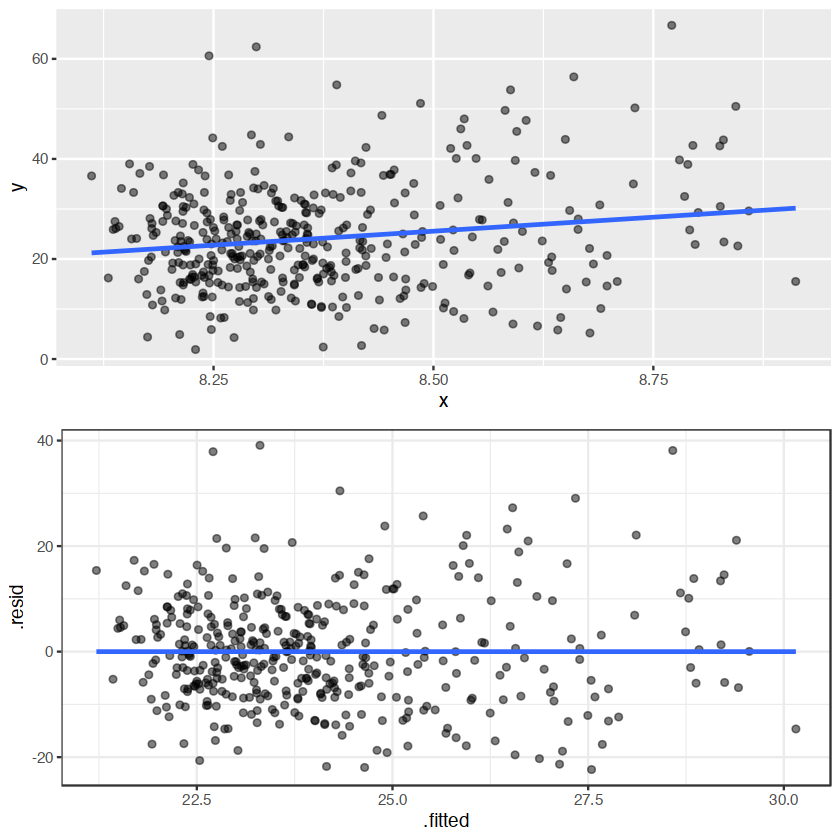

In [300]:
simple_regression_plots(meap93$lexpend, meap93$math10, meap93, alpha=0.5)

When a log scale for the independent variable is utilized, a given percentage change in the independent variable has the same impact on the dependent variable. So, a 1/10 increase in lexpend would result in a 1/10 increase in math10.

(iv) 0.1 * 11.2 = 112% increase in scores.

In [303]:
# (v) I am not sure, there are 17 variables in the dataset, any which could have a pattern of variance
#     that would predict a math10 value over 100. To verify this we would need to try all of the combinations 
#     of all the regressors to show that a value over 100 was not possible. Limitting ourselves to the single
#     regressor in our first model:
model <- lm(math10 ~ expend, meap93)
coeffs <- coefficients(summary(model))
max_math10 <- coeffs[1] + coeffs[2]*max(meap93$expend)
print(max_math10)


[1] 31.57818


In [505]:
# Among all columns:
max_math10 <- c()
for (name in names(meap93[-9])) {
    model <- lm(math10 ~ get(name), data=meap93)
    intercept <- coefficients(summary(model))[1]
    slope <- coefficients(summary(model))[2]
    max10 <- max(intercept + slope * meap93[name])
    max_math10 <- c(max_math10, round(max10, 2))
}
print(max(max_math10))

[1] 34.58


## C7

In [353]:
str(charity)

'data.frame':	4268 obs. of  8 variables:
 $ respond  : int  0 0 0 0 1 0 0 0 0 1 ...
 $ gift     : int  0 0 0 0 10 0 0 0 0 5 ...
 $ resplast : int  0 0 1 0 0 0 0 0 1 0 ...
 $ weekslast: num  143 65.4 13.1 120.1 103.9 ...
 $ propresp : num  0.3 0.3 0.3 0.3 0.2 ...
 $ mailsyear: num  2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ giftlast : int  10 10 10 10 10 10 10 5 10 5 ...
 $ avggift  : num  10 10 10 10 10 10 10 6 10 5 ...
 - attr(*, "time.stamp")= chr "25 Jun 2011 23:03"


In [362]:
# (i)
print(mean(charity$gift))
print(nrow(filter(charity, gift == 0))/nrow(charity))

[1] 7.44447
[1] 0.6000469


In [365]:
# (ii)
summarize(charity, mean = round(mean(mailsyear), 2), max = max(mailsyear), min = min(mailsyear))

mean,max,min
<dbl>,<dbl>,<dbl>
2.05,3.5,0.25


In [376]:
# (iii)
model <- lm(gift ~ mailsyear, charity)
summary(model)


Call:
lm(formula = gift ~ mailsyear, data = charity)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.287  -7.976  -5.976   2.687 245.999 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.0141     0.7395   2.724  0.00648 ** 
mailsyear     2.6495     0.3431   7.723  1.4e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.96 on 4266 degrees of freedom
Multiple R-squared:  0.01379,	Adjusted R-squared:  0.01356 
F-statistic: 59.65 on 1 and 4266 DF,  p-value: 1.404e-14


(iv) The slope predicts that, on average, a 1 unit increase in mailsyear will generate 2.65 additional guilders in gifts. It is not 100% clear what the value of mailsyear represents (what is 0.5 of a mailing?).

In [385]:
# (iv) smallest predicted value from model using sample data
coeffs <- coefficients(summary)
round(coeffs[1] + coeffs[2]*min(charity$mailsyear), 2)
# predicted gift cannot be less than the intercept, 2.01, becuase mailings cannot be negative.

[1] 2.68

## C8

In [428]:
# (i)
x <- runif(500, 0, 10)
print(mean(x))
print(var(x)**0.5)

[1] 5.074388
[1] 2.834995


In [429]:
u <- rnorm(500, 0, 36)
print(mean(u))
print(var(u)**0.5)

[1] 0.5260117
[1] 36.22848


The mean is not exactly 0 because it is a sample and not the population. If we took 100,000,000 draws instead we would approach 0. The sample standard deviation is 34.7.

In [430]:
# (ii)
data <- cbind(x, u)

In [431]:
y <- 1 + 2*x + u

In [432]:
data <- cbind(data, y)

In [433]:
data <- as.data.frame(data)

In [434]:
# (iii)
model <- lm(y ~ x, data)
summary(model)


Call:
lm(formula = y ~ x, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-121.196  -24.875   -0.537   22.329  103.896 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   2.5302     3.3274   0.760  0.44736   
x             1.8021     0.5726   3.147  0.00175 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 36.26 on 498 degrees of freedom
Multiple R-squared:  0.0195,	Adjusted R-squared:  0.01753 
F-statistic: 9.906 on 1 and 498 DF,  p-value: 0.001746


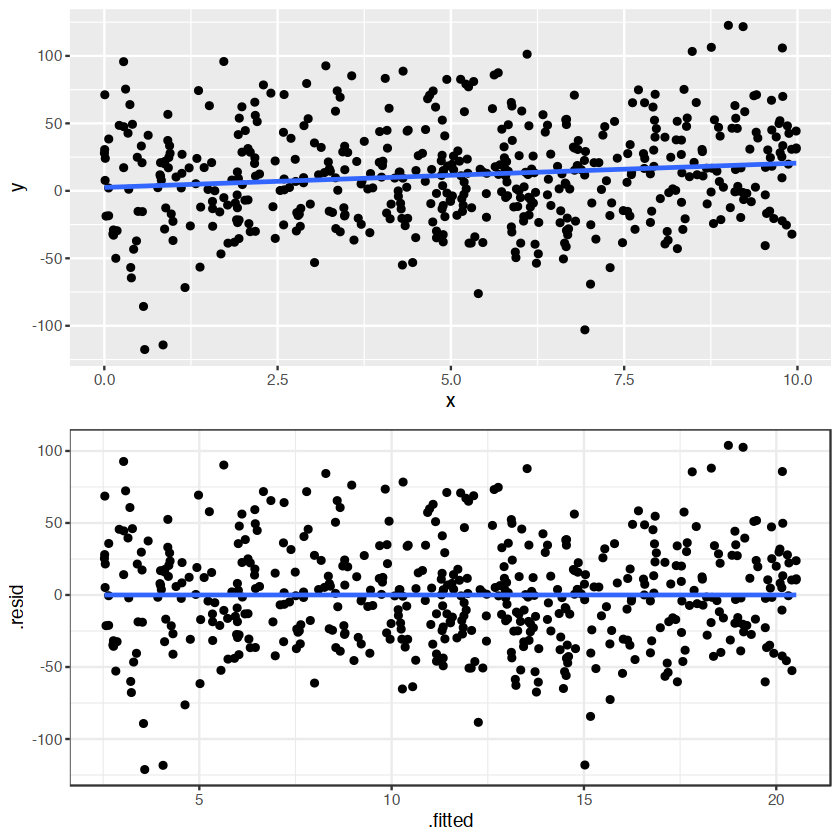

In [435]:
simple_regression_plots(data$x, data$y, data)

In [439]:
# (iv)
data_plus <- augment(model)
head(data_plus)

y,x,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.763915,6.6499326,14.514078,-8.750162,0.002618951,36.29482,7.665495e-05,-0.24163060
45.423625,4.6345563,10.882167,34.541459,0.002048236,36.26380,9.331359e-04,0.95356933
-43.302569,0.4232854,3.293033,-46.595602,0.007393948,36.23627,6.196053e-03,-1.28980139
9.667591,3.3351751,8.540551,1.127040,0.002754224,36.29691,1.337755e-06,0.03112467
16.713143,8.7668078,18.328900,-1.615756,0.005399517,36.29687,5.418912e-06,-0.04468049
-1.920129,4.7920276,11.165946,-13.086075,0.002019879,36.29219,1.320697e-04,-0.36125581


In [ ]:
# (iv) equations (2.60) hold
round(sum(data_plus$.resid), 4)
round(sum(data_plus$.resid * data_plus$x), 4)

In [443]:
# (v) same results
round(sum(data$errors), 4)
round(sum(data$errors * data_plus$x), 4)

[1] 0

[1] 0

In [482]:
# (vi)
gen_reg <- function(size=500) {
    .x <- runif(size, 0, 10)
    .u <- rnorm(size, 0, 36)
    .y <- 1 + 2*.x + .u
    .data <- cbind(.x, .y, .u)
    .data <- as.data.frame(.data)
    .coeffs <- coefficients(summary(lm(.y ~ .x, .data)))
    return(.coeffs)
}

In [484]:
gen_reg(30)

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.285145,11.504645,0.2855495,0.7773250
.x,1.129600,1.883351,0.5997819,0.5534748


## C9

In [485]:
str(countymurders)

'data.frame':	37349 obs. of  20 variables:
 $ arrests    : int  2 3 2 7 3 1 1 2 0 5 ...
 $ countyid   : int  1001 1001 1001 1001 1001 1001 1001 1001 1001 1001 ...
 $ density    : num  54 53.7 53.8 53.8 53.9 ...
 $ popul      : int  32216 31984 32036 32056 32128 32248 32888 33264 33632 33992 ...
 $ perc1019   : num  20.6 20.2 19.7 19.1 18.5 ...
 $ perc2029   : num  15.3 15.6 15.7 15.9 15.9 ...
 $ percblack  : num  22.3 22.1 21.8 21.5 21.3 ...
 $ percmale   : num  40.2 40.4 40.4 40.5 40.5 ...
 $ rpcincmaint: num  168 168 167 177 166 ...
 $ rpcpersinc : num  8781 8233 8328 8546 8965 ...
 $ rpcunemins : num  29.2 43.9 71.4 72.2 40.4 ...
 $ year       : int  1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 ...
 $ murders    : int  2 1 3 7 2 2 4 1 0 3 ...
 $ murdrate   : num  0.621 0.313 0.936 2.184 0.623 ...
 $ arrestrate : num  0.621 0.938 0.624 2.184 0.934 ...
 $ statefips  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ countyfips : int  1 1 1 1 1 1 1 1 1 1 ...
 $ execs      : int  0 0 0 0 0 0 0 0 0 

In [487]:
murders_96 <- filter(countymurders, year == 1996)

In [489]:
nrow(murders_96)

[1] 2197

In [497]:
# (i)
print(nrow(filter(murders_96, murders == 0)))
print(nrow(filter(murders_96, execs > 0)))
filter(murders_96, execs == max(execs))

[1] 1051
[1] 31


arrests,countyid,density,popul,perc1019,perc2029,percblack,percmale,rpcincmaint,rpcpersinc,rpcunemins,year,murders,murdrate,arrestrate,statefips,countyfips,execs,lpopul,execrate
<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
34,45019,302.7346,277721,12.68575,17.78944,36.26301,48.23906,253.924,14554.06,37.004,1996,32,1.152236,1.22425,45,19,3,12.53437,0.1080221


In [498]:
# (ii)
model <- lm(murders ~ execs, murders_96)
summary(model)


Call:
lm(formula = murders ~ execs, data = murders_96)

Residuals:
    Min      1Q  Median      3Q     Max 
-149.12   -5.46   -4.46   -2.46 1338.99 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.4572     0.8348   6.537 7.79e-11 ***
execs        58.5555     5.8333  10.038  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 38.89 on 2195 degrees of freedom
Multiple R-squared:  0.04389,	Adjusted R-squared:  0.04346 
F-statistic: 100.8 on 1 and 2195 DF,  p-value: < 2.2e-16


(iii) The slope of 58.6 predicts 58.6 additional murders per an execution in a county. The estimation only indicates a correlation between murders and executions, so the model neither supports nor refutes the theory of execution as deterrence.

In [506]:
# (iv)
min_murders <- c()
for (name in names(murders_96[-13])) {
    model <- lm(murders ~ get(name), data=murders_96)
    intercept <- coefficients(summary(model))[1]
    slope <- coefficients(summary(model))[2]
    min_murder <- min(intercept + slope * murders_96[name])
    min_murders <- c(min_murders, round(min_murder, 2))
}
names(min_murders) = names(murders_96[-13])
print(min(min_murders))
min_murders

[1] -48.73


arrests    countyid     density       popul    perc1019    perc2029 
       0.71        3.22        4.22       -4.99      -23.33       -4.18 
  percblack    percmale rpcincmaint  rpcpersinc  rpcunemins        year 
       2.64      -14.22       -4.75      -12.95        5.07     1699.57 
   murdrate  arrestrate   statefips  countyfips       execs      lpopul 
       1.35        3.65        3.21        2.95        5.46      -48.73 
   execrate 
       6.28

## C10

In [507]:
str(catholic)

'data.frame':	7430 obs. of  13 variables:
 $ id      : int  124902 124915 124916 124932 124944 124947 124966 124968 124972 124974 ...
 $ read12  : num  61.4 58.3 59.3 49.6 57.6 ...
 $ math12  : num  49.8 59.8 50.4 45 54.3 ...
 $ female  : int  0 0 1 1 1 1 1 0 0 0 ...
 $ asian   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hispan  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ black   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ motheduc: num  14 14 14 12 12 12 14 14 14 14 ...
 $ fatheduc: num  12 14 11 14 12 11 14 14 14 12 ...
 $ lfaminc : num  10.3 10.3 10.3 10.3 10.7 ...
 $ hsgrad  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ cathhs  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ parcath : int  1 1 1 1 1 1 1 1 1 1 ...


In [508]:
# (i)
summarize(catholic, mean_read12 = mean(read12), sd_read12=var(read12)**0.5, 
          mean_math12 = mean(math12), sd_math12=var(math12)**0.5)

mean_read12,sd_read12,mean_math12,sd_math12
<dbl>,<dbl>,<dbl>,<dbl>
51.7724,9.407761,52.13362,9.459117


In [509]:
# (ii)
model <- lm(math12 ~ read12, catholic)
summary(model)


Call:
lm(formula = math12 ~ read12, data = catholic)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.5477  -4.5934   0.1838   4.6984  27.0182 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 15.15304    0.43204   35.07   <2e-16 ***
read12       0.71429    0.00821   87.00   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.658 on 7428 degrees of freedom
Multiple R-squared:  0.5047,	Adjusted R-squared:  0.5046 
F-statistic:  7569 on 1 and 7428 DF,  p-value: < 2.2e-16


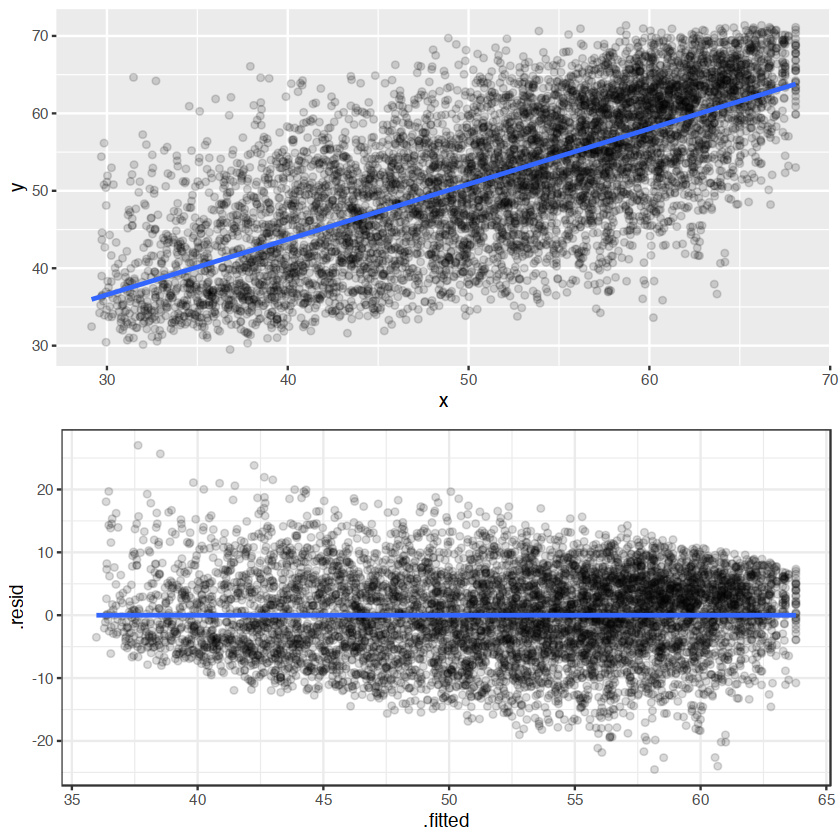

In [514]:
simple_regression_plots(catholic$read12, catholic$math12, catholic, alpha=0.15)

(iii) a reading score of 0 would predict a score of 15% on math.

(v) Correlation is not causation. For example,
a good student will tend perform well on both sections and not only one.

[1] 68.09